In [6]:
import sys
sys.path.append('../')

from model import Model
import torch

In [7]:
kline_size = 50
hidden_layer = 50
column_number = 6
features_number = 0

net = torch.nn.Sequential(
    torch.nn.Linear(column_number * kline_size + features_number, hidden_layer, dtype=torch.float64),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_layer, 1, dtype=torch.float64),
    torch.nn.Tanh()
)

model = Model(net)
model.addDescription(
    {
        'model':
        {
            'scheme':
            [
                ['linear', column_number * kline_size + features_number, hidden_layer],
                'ReLU',
                ['linear', hidden_layer, 1],
                'Tanh'
            ]
        }
    }
)

AttributeError: 'Model' object has no attribute 'addDescription'

In [ ]:
from dataset.preprocess import Preprocessor

description = {'filename': './tmp/trainingData', 'symbol': 'BTCUSDT', 'interval': '1m', 'startTime': 1618012800000, 'endTime': 1620264060000}
model.loadDataset(description, Preprocessor(kline_size, column_number))
model.addDescription({'dataset': description})
model.addDescription({'preprocessor': 'Basic preprocessor, 0 features'})

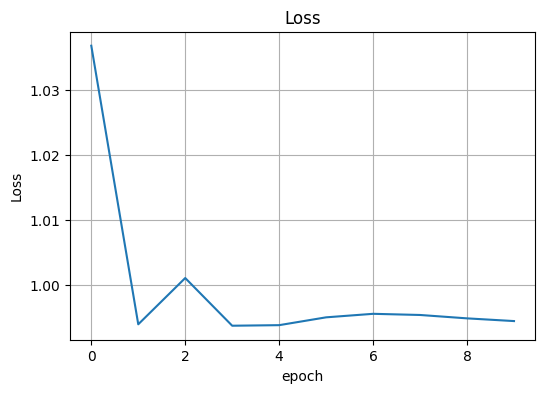

100%|██████████| 10/10 [01:31<00:00,  9.12s/it]


In [ ]:
lr = 0.00001

model.fit(
    torch.optim.Adam(net.parameters(), lr),
    torch.nn.MSELoss(),
)
model.addDescription({'model': {'optimizer': ['Adam', {'lr': lr}]}})
model.addDescription({'model': {'loss': 'MSE'}})

In [ ]:
print(model.getDescription())